<a href="https://colab.research.google.com/github/yunusemremeral/vue-practices/blob/master/24092023v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
!pip install Augmentor

In [38]:
train_path="/content/drive/MyDrive/fabrics/TEZ/cType_1/"
#test_path="/content/drive/MyDrive/fabrics/TEZ/cType_1/"
data_dir_train = pathlib.Path(train_path)
#data_dir_test = pathlib.Path(test_path)

In [39]:
image_count_train = len(list(data_dir_train.glob('*/*.jpeg')))
print(image_count_train)
#image_count_test = len(list(data_dir_test.glob('*/*.jpeg')))
#print(image_count_test)

400


In [40]:
batch_size = 32
img_height = 512
img_width = 768

In [41]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 440 files belonging to 8 classes.
Using 352 files for training.


In [42]:
class_names = train_ds.class_names
print(class_names)

['e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7']


In [43]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 440 files belonging to 8 classes.
Using 88 files for validation.


In [44]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(train_path + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(495) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 50 image(s) found.
Output directory set to /content/drive/MyDrive/fabrics/TEZ/cType_1/e0/output.

Processing <PIL.Image.Image image mode=RGB size=768x512 at 0x7C57F4B69960>: 100%|██████████| 495/495 [00:28<00:00, 17.23 Samples/s]


Initialised with 50 image(s) found.
Output directory set to /content/drive/MyDrive/fabrics/TEZ/cType_1/e1/output.

Processing <PIL.Image.Image image mode=RGB size=768x512 at 0x7C5764553BB0>: 100%|██████████| 495/495 [00:27<00:00, 17.82 Samples/s]


Initialised with 50 image(s) found.
Output directory set to /content/drive/MyDrive/fabrics/TEZ/cType_1/e2/output.

Processing <PIL.Image.Image image mode=RGB size=768x512 at 0x7C56D03766B0>: 100%|██████████| 495/495 [00:23<00:00, 21.31 Samples/s]


Initialised with 50 image(s) found.
Output directory set to /content/drive/MyDrive/fabrics/TEZ/cType_1/e3/output.

Processing <PIL.Image.Image image mode=RGB size=768x512 at 0x7C56D03ADAE0>: 100%|██████████| 495/495 [00:21<00:00, 23.49 Samples/s]


Initialised with 50 image(s) found.
Output directory set to /content/drive/MyDrive/fabrics/TEZ/cType_1/e4/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x512 at 0x7C56D035E2F0>: 100%|██████████| 495/495 [00:22<00:00, 22.01 Samples/s]


Initialised with 50 image(s) found.
Output directory set to /content/drive/MyDrive/fabrics/TEZ/cType_1/e5/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x512 at 0x7C56D03765F0>: 100%|██████████| 495/495 [00:26<00:00, 18.73 Samples/s]


Initialised with 50 image(s) found.
Output directory set to /content/drive/MyDrive/fabrics/TEZ/cType_1/e6/output.

Processing <PIL.Image.Image image mode=RGB size=768x512 at 0x7C56D03ADDE0>: 100%|██████████| 495/495 [00:21<00:00, 23.25 Samples/s]


Initialised with 50 image(s) found.
Output directory set to /content/drive/MyDrive/fabrics/TEZ/cType_1/e7/output.

Processing <PIL.Image.Image image mode=RGB size=768x512 at 0x7C57F4B699F0>: 100%|██████████| 495/495 [00:23<00:00, 21.49 Samples/s]


In [45]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpeg')))
print(image_count_train)

4000


In [57]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4400 files belonging to 8 classes.
Using 3520 files for training.


In [58]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpeg'))]

In [59]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpeg'))]


In [60]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [61]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpeg')))
    length_out=len(list(class_directory_out.glob('*.jpeg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

e0 has 550 samples.
e1 has 550 samples.
e2 has 550 samples.
e3 has 550 samples.
e4 has 550 samples.
e5 has 550 samples.
e6 has 550 samples.
e7 has 550 samples.


In [62]:
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(8, activation='softmax')
])

In [63]:
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [64]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
110/110 [==============================] - 80s 690ms/step - loss: 9.3561 - accuracy: 0.1202 - val_loss: 2.0791 - val_accuracy: 0.1477
Epoch 2/30
110/110 [==============================] - 76s 681ms/step - loss: 2.0814 - accuracy: 0.1315 - val_loss: 2.0799 - val_accuracy: 0.1136
Epoch 3/30
110/110 [==============================] - 76s 684ms/step - loss: 2.0784 - accuracy: 0.1358 - val_loss: 2.0803 - val_accuracy: 0.1136
Epoch 4/30
110/110 [==============================] - 76s 682ms/step - loss: 2.0735 - accuracy: 0.1355 - val_loss: 2.0775 - val_accuracy: 0.1023
Epoch 5/30
110/110 [==============================] - 76s 684ms/step - loss: 2.0609 - accuracy: 0.1489 - val_loss: 2.0858 - val_accuracy: 0.1023
Epoch 6/30
110/110 [==============================] - 76s 681ms/step - loss: 1.9764 - accuracy: 0.1974 - val_loss: 1.9784 - val_accuracy: 0.2273
Epoch 7/30
110/110 [==============================] - 75s 671ms/step - loss: 1.8220 - accuracy: 0.2605 - val_loss: 1.9758 - val_ac

In [53]:
import os
model_final.save(f"./models/v2")
!zip -r /content/defact_detection_highest.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/v2/ (stored 0%)
  adding: content/models/v2/variables/ (stored 0%)
  adding: content/models/v2/variables/variables.index (deflated 62%)
  adding: content/models/v2/variables/variables.data-00000-of-00001 (deflated 18%)
  adding: content/models/v2/keras_metadata.pb (deflated 90%)
  adding: content/models/v2/saved_model.pb (deflated 88%)
  adding: content/models/v2/fingerprint.pb (stored 0%)
  adding: content/models/v2/assets/ (stored 0%)


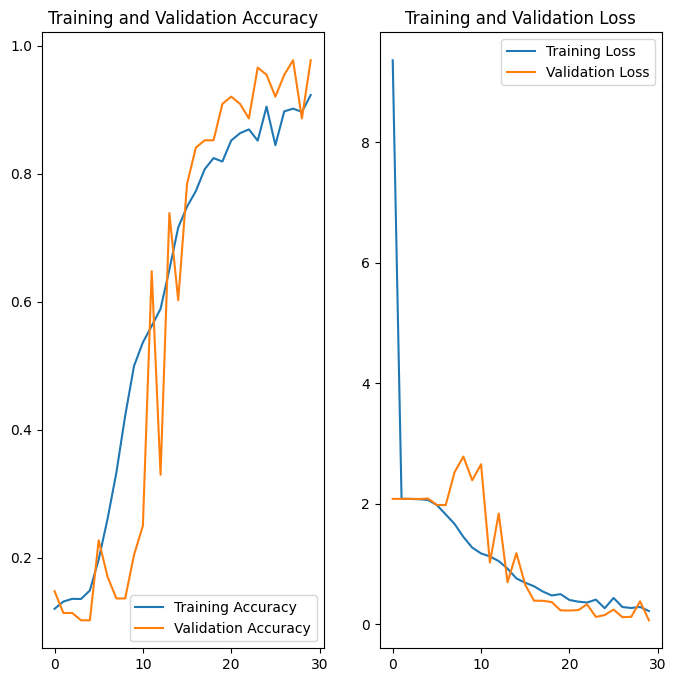

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [55]:
model_final.predict(val_ds)

3/3 [==============================] - 1s 101ms/step


array([[0.12728576, 0.12172253, 0.12692373, 0.1280421 , 0.12733345,
        0.12783256, 0.11451042, 0.12634945],
       [0.12731627, 0.12145251, 0.12666172, 0.12774159, 0.12759817,
        0.12828739, 0.11535446, 0.12558794],
       [0.12727508, 0.12168097, 0.12687016, 0.12796387, 0.12740217,
        0.12795149, 0.11469768, 0.12615861],
       [0.1273038 , 0.12169188, 0.12690638, 0.12803784, 0.12733762,
        0.12783872, 0.11455254, 0.12633121],
       [0.12729461, 0.12155224, 0.12674949, 0.12783082, 0.12751955,
        0.1281528 , 0.11508164, 0.12581883],
       [0.12728392, 0.12166005, 0.12685536, 0.12795384, 0.12741119,
        0.12796654, 0.11473924, 0.12612987],
       [0.1272826 , 0.12167935, 0.12687485, 0.12797718, 0.12739062,
        0.12793118, 0.11467561, 0.12618864],
       [0.12729672, 0.12155632, 0.12675563, 0.12784062, 0.12751101,
        0.12813793, 0.11505946, 0.12584232],
       [0.1272958 , 0.12159788, 0.12679915, 0.12789455, 0.12746361,
        0.12805623, 0.114915

In [68]:
import shutil
shutil.copy('/content/defact_detection_highest.zip','/content/drive/MyDrive/')

'/content/drive/MyDrive/defact_detection_highest.zip'

In [56]:
scores = model_final.evaluate(test)

NameError: ignored